## Project Title : 
Churn Prediction Project 

## Project Description: 
This project is known as churn prediction for a telecome company.  Imagine that we are working at a telecom company that offers phone and internet
services, and we have a problem: some of our customers are churning. They no longer are using our services and are going to a different provider. We would like to prevent that from happening, so we develop a system for identifying these customers and offer them an incentive to stay. We want to target them with promotional messages and give them a discount. We also would like to understand why the model thinks our customers churn, and for that, we need to be able to interpret the model’s predictions.
 
We have collected a dataset where we’ve recorded some information about our customers: what type of services they used, how much they paid, and how long they stayed with us. We also know who canceled their contracts and stopped using our services (churned). We will use this information as the target variable in the machinelearning model and predict it using all other available information. 

The project plan is as follows: 
- First, we download the dataset and do some initial preparation: rename columns and change values inside columns to be consistent throughout the entire dataset.
- Then we split the data into train, validation, and test so we can validate our models.
- As part of the initial data analysis, we look at feature importance to identify which features are important in our data.
- We transform categorical variables into numeric variables so we can use them in the model.
- Finally, we train a logistic regression model.

## Dataset Description
- Url:  https://www.kaggle.com/blastchar/telco-customer-churn.

- Column description
    - CustomerID: the ID of the customer
    - Gender: male/female
    - SeniorCitizen: whether the customer is a senior citizen (0/1)
    - Partner: whether they live with a partner (yes/no)
    - Dependents: whether they have dependents (yes/no)
    - Tenure: number of months since the start of the contract
    - PhoneService: whether they have phone service (yes/no)
    - MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
    - InternetService: the type of internet service (no/fiber/optic)
    - OnlineSecurity: if online security is enabled (yes/no/no internet)
    - OnlineBackup: if online backup service is enabled (yes/no/no internet)
    - DeviceProtection: if the device protection service is enabled (yes/no/no internet)
    - TechSupport: if the customer has tech support (yes/no/no internet)
    - StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
    - StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
    - Contract: the type of contract (monthly/yearly/two years)
    - PaperlessBilling: if the billing is paperless (yes/no)
    - PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
    - MonthlyCharges: the amount charged monthly (numeric)
    - TotalCharges: the total amount charged (numeric)
    - Churn: if the client has canceled the contract (yes/no)

## Environment Configuration
- Installing virtual Env
    - pip install pipenv 

- Installing Packages
    - pipenv install jupyter notebook pandas pyarrow numpy matplotlib seaborn scikit-learn

- Starting Virtual Env
    - pipenv shell 

- Starting Notebook
    - jupyter-notebook 

- Stoping Notebook 
    - Ctrl+c

- Deactiving Virtual Env
    - exit

## Importing Libraries

In [121]:
## librarie(s) for loading and preprocessing 

import pandas as pd
import numpy as np
## libarie(s) for visualization 
import seaborn as sns
import matplotlib.pyplot as plt


## Loading And Data Overview

In [122]:
## load dataset
data =pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [123]:
## create a copy of the
df =data.copy(deep=True)

In [124]:
## view the first five rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
## last five rows 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [90]:
## check for the total rows and columns 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
## check for the brief column summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
## check for missing values 
missing_values = df.isnull().sum()

In [93]:
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [94]:
## lets check for duplicates 
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [95]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [96]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [97]:
df['SeniorCitizen'].unique()

array([0, 1])

In [98]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [100]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [101]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [102]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [103]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [104]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [105]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [106]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [107]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [108]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [109]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [110]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [111]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [112]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [113]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [114]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [115]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Data Preprocessing 
- Normalizing the column names 
- Replacing empty string with nan and fill for missing values 
- deleted the customer id column 
- change the data type on the columns 
- any other processing that is necessary

In [116]:
## let convert the the column names to lower case
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [136]:
## let convert the the column names to lower case
for each_item in df.columns:
    df.columns = df.columns .str.lower()

In [137]:
## preview the columns
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [119]:
## replace  values in totalcharges column 


In [138]:
df.head

<bound method NDFrame.head of       customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice     multiplelines internetservice onlinesecurity  ...  \
0              No  No phone service             DSL   

In [140]:
## fill in the missing values in the totalcharges column with mean
df['totalcharges']=df['totalcharges'].replace(' ', np.nan)

In [142]:
df['totalcharges'].isnull().sum()

np.int64(11)

In [144]:
#chnaging total charges datatyupe to float
df['totalcharges']=df['totalcharges'].astype('float')

In [145]:
#mean
mean_total = df['totalcharges'].mean()
mean_total

np.float64(2283.3004408418656)

In [146]:
#replacing the totalcharges datat type with mean
df['totalcharges']=df['totalcharges'].fillna(2283.3004408418656)


In [147]:
df['totalcharges'].isnull().sum()

np.int64(0)

In [149]:
## delete the customer id column 
df.drop(columns=['customerid'], inplace=True)

In [151]:
##del df['customerid']
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
## display the first five rows using the transpose
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No
onlinebackup,Yes,No,Yes,No,No


In [157]:
## lets change the datatype of 'object' columns to category datatypes.
for columntype_object in df.select_dtypes(include='object').columns:
    df[columntype_object]=df[columntype_object].astype('category')

In [158]:
df.dtypes

gender              category
seniorcitizen          int64
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [159]:
## lets convert the target column, where yes == 1 and no = 0
df['churn'] = df['churn'].replace('yes',1)
df['churn'] = df['churn'].replace('no',0)

In [160]:
## lets preview the churn column 
df['churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

#### Exploratory Data Analysis
- Target Variable Analysis 
- Outlier analysis 
- any other analysis which is important to this work.

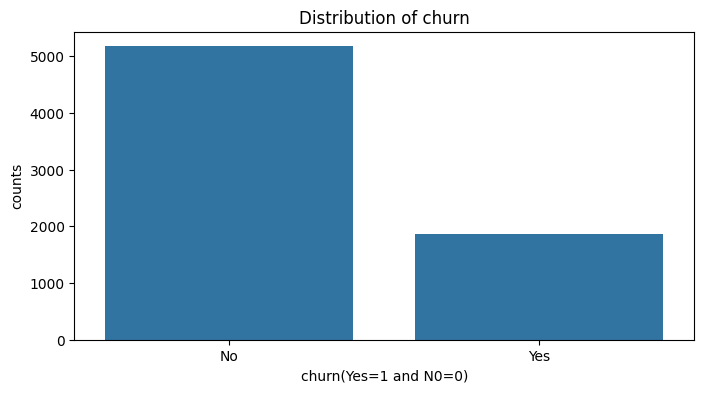

In [162]:
## displaying a cpontplot for churn
plt.figure(figsize=(8,4))
sns.countplot(x='churn',data=df)
plt.title('Distribution of churn')
plt.xlabel('churn(Yes=1 and N0=0)')
plt.ylabel('counts')
plt.show()